In [86]:
import pandas as pd
import re

%matplotlib inline

In [87]:
df = pd.read_csv("data/questions.csv", nrows=1000)

# More info for this powerful method https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [88]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


### Create two columns (one for each question) with the normalized text.

In [ ]:
# Suggestion, start from this function

def normalize(df):
    text = ?
    pattern = re.compile('[\W]+', re.UNICODE) # \W Matches any character which is not a word character.
    pattern.sub(r' ', text.lower()).strip()
    
    return ?

In [93]:
def normalize(df):
    text = df
    pattern = re.compile('[\W]+', re.UNICODE) # \W Matches any character which is not a word character.
    
    return pattern.sub(r' ', text.lower()).strip() 
    
df["normalized_q1"] = df['question1'].apply(normalize)
#df.loc[:,"normalized_q2"] = df['question2'].apply(normalize)

In [94]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,normalized_q1,length_q1
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,14
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor diamond,10
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,14
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,11
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,13


### Create two columns (one for each question) with the length of each question and plot the two distribution.

In [95]:
df.loc[:,"length_q1"] = df['normalized_q1'].apply(lambda x: len(x.split(" ")))
df.loc[:,"length_q2"] = df['normalized_q2'].apply(lambda x: len(x.split(" ")))

KeyError: 'normalized_q2'

In [30]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,normalized_q1,normalized_q2,length_q1,length_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,10,15
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,11,13
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,13,7


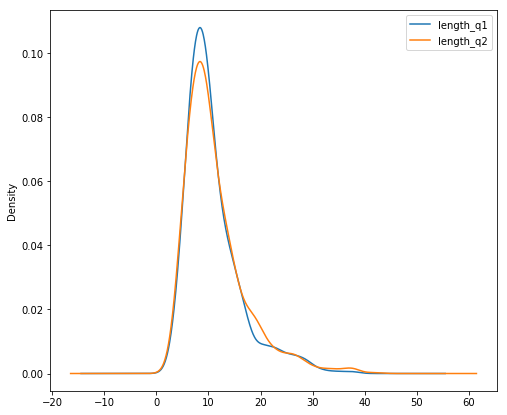

In [29]:
df[['length_q1','length_q2']].plot(figsize=[8,7], kind='kde')

### Can we use the length of the questions as a feature?
### Plot the length distributions for duplicate and not duplicate pair of questions and compute the correlation

In [91]:
df[df['is_duplicate'] == 1][['length_q1','length_q2']].plot(kind='scatter',x='length_q1',y='length_q2',alpha=0.5)
df[df['is_duplicate'] == 0][['length_q1','length_q2']].plot(kind='scatter',x='length_q1',y='length_q2', alpha=0.5)

KeyError: "['length_q1' 'length_q2'] not in index"

In [90]:
df[df['is_duplicate'] == 1][['length_q1','length_q2']].corr('pearson')

KeyError: "['length_q1' 'length_q2'] not in index"

### Compute the number of words they have in common


In [51]:
def common_words(df):
    q1 = df['normalized_q1'].split(" ")
    q2 = df['normalized_q2'].split(" ")
    count = 0
    for w1 in q1:
        for w2 in q2:
            if w1 == w2:
                count += 1
    return count

In [53]:
df.loc[:,'common_words'] = df.apply(common_words, axis=1)

In [55]:
df.loc[:,'percentage'] = df['common_words'] * 100 / (df['length_q1'] + df['length_q2'])

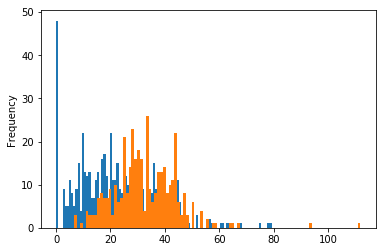

In [65]:
df[df['is_duplicate'] == 0]['percentage'].plot(kind='hist', bins=100)
df[df['is_duplicate'] == 1]['percentage'].plot(kind='hist', bins=100)

### Compute the number of duplicate questions and plot an hist

Suggestion: think about groupby

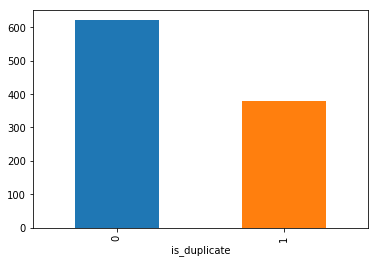

In [66]:
df.groupby('is_duplicate').size().plot(kind='bar')

In [68]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,normalized_q1,normalized_q2,length_q1,length_q2,common_words,percentage
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,14,12,15,57.692308
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,10,15,8,32.000000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,14,10,4,16.666667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,11,13,0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,13,7,4,20.000000


In [67]:
from sklearn.model_selection import train_test_split

In [74]:
df = df.rename(columns={'length_q1':'f_length_q1','length_q2':'f_length_q2','common_words':'f_common_words','percentage':'f_percentage'})

feat = [f for f in df.columns if f.startswith('f_')]
target = df['is_duplicate']

In [76]:
df_X_train, df_X_test, df_y_train, df_y_test = \
    train_test_split(df[feat], target, test_size=0.2, random_state=42, stratify=target)